# UAS Kapita Selekta Komputasi
# Nama : Early Hidayati
# Nim : 11150940000066

In [36]:
# Importing Some Python Modules
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings; warnings.simplefilter('ignore')
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [37]:
yt= pd.read_csv('C:/Users/USER/Documents/KAPSEL/youtube-new/CAvideos.csv')
yt.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


Dataset ini mencakup beberapa bulan dan merupakan data pada video YouTube trending harian. Data diteliti untuk wilayah Canada, dengan hingga 200 video tren yang terdaftar per hari. Data berisi judul video, judul saluran, waktu publikasi, tag, tampilan, suka dan tidak suka, deskripsi, dan jumlah komentar.

# Hipotesis

    Hipotesis: Jenis kontent lagu cenderung lebih mudah untuk menjadi trending pada Canada
               Judul kontent yotube yang menarik lebih mudah menjadi trending pada Canada

# Data Wraggling & Preprocessing

data ini mengandung beberapa tipe data yaiti;
Numerik : views, likes, dislikes, dan comment_count
Kategorik : category_id, comment_disabled, dan rating_disabled
Waktu : trensing_date, dan publish_time
text : description

In [38]:
yt.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [39]:
#Mengubah type data menjadi numerik
yt['trending_date'] = pd.to_numeric(yt['trending_date'], errors='coerce')

In [40]:
#cek type data yang sudah diubah
yt.dtypes

video_id                   object
trending_date             float64
title                      object
channel_title              object
category_id                 int64
publish_time               object
tags                       object
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
thumbnail_link             object
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                object
dtype: object

In [41]:
#Mengubah type data menjadi numerik
yt['publish_time'] = pd.to_numeric(yt['publish_time'], errors='coerce')

In [42]:
#cek type data yang sudah diubah
yt.dtypes

video_id                   object
trending_date             float64
title                      object
channel_title              object
category_id                 int64
publish_time              float64
tags                       object
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
thumbnail_link             object
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                object
dtype: object

## MIssing Value 


data ini mengandung beberapa tipe data :
Numerik : 
Kategorik : 
Waktu : 

In [43]:
yt.describe(include='all')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
count,40881,0.0,40881,40881,40881.000000,0.0,40881,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04,40881,40881,40881,40881,39585
unique,24427,NaN,24573,5076,NaN,NaN,20157,NaN,NaN,NaN,NaN,24422,2,2,2,22345
top,l_lblj8Cq0o,NaN,Drake - God's Plan (Official Audio),SET India,NaN,NaN,[none],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/l_lblj8Cq0o/default.jpg,False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,8,NaN,15,192,NaN,NaN,2385,NaN,NaN,NaN,NaN,8,40298,40602,40854,130
mean,NaN,NaN,NaN,NaN,20.795553,NaN,NaN,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,6.775054,NaN,NaN,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03,NaN,NaN,NaN,NaN,NaN


In [44]:
# Menghilangkan nilai Na (jika ada) : listwisedeletion
yt_new = yt.dropna()
yt_new.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description


# Outlier

Outlier tidak digunakan karena peneliti ingin melihat variasi dari data diatas, sehingga setiap outlier akan berpengaruh pada analisysnya

# Noise

Noise tidak digunakan karena peneliti ingin melihat variasi dari data diatas, sehingga setiap outlier akan berpengaruh pada analisysnya

# Exploratory Data Analysis (EDA)

In [45]:
yt.describe()

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count
count,0.0,40881.000000,0.0,4.088100e+04,4.088100e+04,4.088100e+04,4.088100e+04
mean,NaN,20.795553,NaN,1.147036e+06,3.958269e+04,2.009195e+03,5.042975e+03
std,NaN,6.775054,NaN,3.390913e+06,1.326895e+05,1.900837e+04,2.157902e+04
min,NaN,1.000000,NaN,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,20.000000,NaN,1.439020e+05,2.191000e+03,9.900000e+01,4.170000e+02
50%,NaN,24.000000,NaN,3.712040e+05,8.780000e+03,3.030000e+02,1.301000e+03
75%,NaN,24.000000,NaN,9.633020e+05,2.871700e+04,9.500000e+02,3.713000e+03
max,NaN,43.000000,NaN,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [46]:
yt.head(12)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,NaN,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,NaN,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,NaN,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,NaN,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,NaN,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,NaN,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,NaN,I Dare You: GOING BALD!?,nigahiga,24,NaN,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,NaN,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,NaN,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
5,0yIWz1XEeyc,NaN,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,NaN,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
6,_uM5kFfkhB8,NaN,Vanoss Superhero School - New Students,VanossGaming,23,NaN,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...
7,2kyS6SvSYSE,NaN,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,NaN,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
8,JzCsM1vtn78,NaN,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,NaN,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...
9,43sm-QwLcx4,NaN,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,NaN,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...


Pada tabel di atas menggambarkan views paling banyak atau video paling banyak diminati adalah video dengan kategori musik. Seperti pada category_id 10 yaitu merupakan kategori untuk musik.

In [47]:
yt.groupby(["category_id"]).sum()

,trending_date,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,,,,,,,,,
1,0.0,0.0,2939060844,77802003,3111259,10086573,15.0,13.0,11.0
2,0.0,0.0,200066074,4732114,197776,1016188,2.0,0.0,1.0
10,0.0,0.0,13179850194,564447530,22098190,52435252,20.0,12.0,1.0
15,0.0,0.0,235592173,8830736,185003,1823538,0.0,0.0,0.0
17,0.0,0.0,2997652188,59449419,3286369,7661342,14.0,10.0,1.0
19,0.0,0.0,143746952,3750914,129861,609953,3.0,0.0,0.0
20,0.0,0.0,1241532385,51726552,2446882,9664887,3.0,1.0,0.0
22,0.0,0.0,3228227926,105388564,9480796,16818201,58.0,25.0,2.0
23,0.0,0.0,3708438785,196046674,5372515,19638776,9.0,0.0,2.0


In [48]:
yt.groupby(["category_id"]).count()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
category_id,,,,,,,,,,,,,,,
1,2060,0,2060,2060,0,2060,2060,2060,2060,2060,2060,2060,2060,2060,2001
2,353,0,353,353,0,353,353,353,353,353,353,353,353,353,348
10,3731,0,3731,3731,0,3731,3731,3731,3731,3731,3731,3731,3731,3731,3695
15,369,0,369,369,0,369,369,369,369,369,369,369,369,369,369
17,2787,0,2787,2787,0,2787,2787,2787,2787,2787,2787,2787,2787,2787,2650
19,392,0,392,392,0,392,392,392,392,392,392,392,392,392,377
20,1344,0,1344,1344,0,1344,1344,1344,1344,1344,1344,1344,1344,1344,1330
22,4105,0,4105,4105,0,4105,4105,4105,4105,4105,4105,4105,4105,4105,3726
23,3773,0,3773,3773,0,3773,3773,3773,3773,3773,3773,3773,3773,3773,3725


In [49]:
yt.groupby(["title"]).count()

,video_id,trending_date,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
title,,,,,,,,,,,,,,,
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting Over It - Part 7,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
"#1 Fortnite World Rank - 2,323 Solo Wins!",1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
"#1 Fortnite World Rank - 2,330 Solo Wins!",1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
#1 MOST ANTICIPATED VIDEO (Timber Frame House Raising),2,0,2,2,0,2,2,2,2,2,2,2,2,2,2
#1 WORLD RANKED 1463 SOLO WINS! - FORTNITE BATTLE ROYALE LIVE STREAM,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
"#1 WORLD RECORD 3,288 SOLO WINS",1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
"#1 World Ranked - 1,700 Solo Wins - New Minigun Update",1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
"#1 World Record 3,225 Solo Wins | Fortnite Live Stream",1,0,1,1,0,1,1,1,1,1,1,1,1,1,1
"#1 World Record 3,359 Solo Wins | Fortnite Live Stream",1,0,1,1,0,1,1,1,1,1,1,1,1,1,1


In [50]:
yt.groupby(["title"]).sum()

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
title,,,,,,,,,,
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting Over It - Part 7,0.0,20,0.0,835930,47058,1023,8250,0.0,0.0,0.0
"#1 Fortnite World Rank - 2,323 Solo Wins!",0.0,20,0.0,212838,5199,542,11,0.0,0.0,0.0
"#1 Fortnite World Rank - 2,330 Solo Wins!",0.0,20,0.0,200764,5620,537,45,0.0,0.0,0.0
#1 MOST ANTICIPATED VIDEO (Timber Frame House Raising),0.0,48,0.0,311914,23276,488,5566,0.0,0.0,0.0
#1 WORLD RANKED 1463 SOLO WINS! - FORTNITE BATTLE ROYALE LIVE STREAM,0.0,20,0.0,541482,15430,891,40,0.0,0.0,0.0
"#1 WORLD RECORD 3,288 SOLO WINS",0.0,20,0.0,305919,4987,1335,35,0.0,0.0,0.0
"#1 World Ranked - 1,700 Solo Wins - New Minigun Update",0.0,20,0.0,617348,12553,739,19,0.0,0.0,0.0
"#1 World Record 3,225 Solo Wins | Fortnite Live Stream",0.0,20,0.0,152389,2753,777,10,0.0,0.0,0.0
"#1 World Record 3,359 Solo Wins | Fortnite Live Stream",0.0,20,0.0,229842,3676,1324,32,0.0,0.0,0.0


In [51]:
d = yt.groupby(["trending_date"]).mean()
print(d.shape)
d

(0, 9)


,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
trending_date,,,,,,,,,


# Unstack

In [52]:
d = yt.groupby(["trending_date"]).mean().unstack()
print(d.shape)
d

(0,)


Series([], dtype: float64)

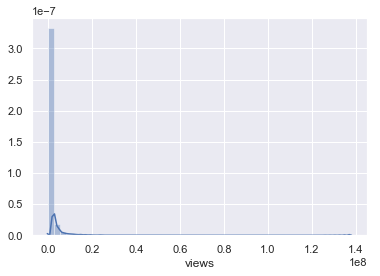

In [53]:
sns.distplot(yt.views, kde=True)

# Clustering

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.75, min_df=5)
X = tfidf_vectorizer.fit_transform(yt['title'].tolist())
print(X.shape)

(40881, 8545)


In [55]:
from sklearn import cluster

k = 5
seed = 99 # Sembarang nilai untuk Random generator, mengapa penting?
km = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = seed)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=99, tol=0.0001, verbose=0)

In [56]:
# Hasil clusteringnya
C_km = km.predict(X)
C_km[:10]

array([0, 0, 0, 0, 4, 0, 0, 0, 1, 1])

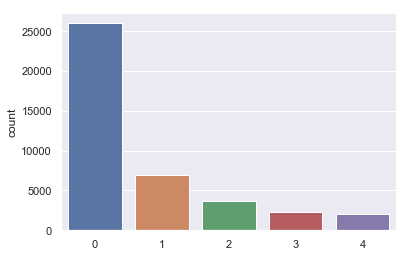

In [57]:
import seaborn as sns
sns.countplot(C_km)

yang menduduki peringkat atas berada pada cluster pertama

Kesimpulan:
    
    Youtube adalah salah satu situs web yang dapat menampilkan video-vedeo dari seluruh dunia. Dalam menentukan suatu video dalam tren teratas youtube biasanya menggunakan penilain dari penggunanya seperti suka,komentar, jumlah penonton atau tampilan, dan berbagi).Dari pengamatan di atas tren yang menduduki teratas adalah Penampil teratas di daftar tren YouTube adalah video musik (seperti “Gangam Style” ), pertunjukan selebriti dan / atau reality TV, dan video viral yang terkenal dengan YouTube.